# Name: Sai Sriharsha Griddaluru
## Email: sgridda@clemson.edu
## CUID: C15358926


# HW 1: TASK 2: Training on Actual Tasks

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor() 

train_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='deep-learning/hw-1/dataset', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 59926966.38it/s]


Extracting deep-learning/hw-1/dataset/MNIST/raw/train-images-idx3-ubyte.gz to deep-learning/hw-1/dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1258421.92it/s]

Extracting deep-learning/hw-1/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to deep-learning/hw-1/dataset/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 19096759.34it/s]

Extracting deep-learning/hw-1/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to deep-learning/hw-1/dataset/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9256816.70it/s]

Extracting deep-learning/hw-1/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to deep-learning/hw-1/dataset/MNIST/raw



In [3]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: deep-learning/hw-1/dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: deep-learning/hw-1/dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [23]:
train_loader = DataLoader(train_data_set, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=10, shuffle=False)

# CNN with MNIST Model 1

In [24]:
convul1 = nn.Conv2d(1, 8, 3, 1)
convul2 = nn.Conv2d(8, 18, 3, 1)

In [25]:
class ConvolNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.convul1 = nn.Conv2d(1, 8, 3, 1)
        self.convul2 = nn.Conv2d(8, 18, 3, 1)
        self.fc1 = nn.Linear(5*5*18, 18)
        self.fc2 = nn.Linear(18,10)
                

    def forward(self, x):
        x = F.relu(self.convul1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.convul2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5*5*18)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [26]:
model1 = ConvolNetwork1()
model1

ConvolNetwork1(
  (convul1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (convul2): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=450, out_features=18, bias=True)
  (fc2): Linear(in_features=18, out_features=10, bias=True)
)

In [27]:
crit_loss1 = nn.CrossEntropyLoss()
optim1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [28]:
epochs = 20
train_losses1 = []
test_losses1 = []
train_correct1 = []
test_correct1 = []

for i in range(epochs):
    train_corr1 = 0
    test_corr1 = 0
    
    # training the batches
    for b, (x_train, y_train) in enumerate(train_loader):
        
        # Applying the model
        y_pred = model1(x_train)  
        loss = crit_loss1(y_pred, y_train)
 
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr1 += batch_corr
        
        # Updating parameters
        optim1.zero_grad()
        loss.backward()
        optim1.step()
        
        
    train_losses1.append(loss)
    train_correct1.append(train_corr1)
        
    # testing the batches
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model1(x_test)

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr1 += (predicted == y_test).sum()
            
    loss = crit_loss1(y_val, y_test)
    test_losses1.append(loss)
    test_correct1.append(test_corr1)

In [29]:
train_losses1=torch.tensor(train_losses1)

# CNN with MNIST Model 2

In [30]:
con1 = nn.Conv2d(1, 6, 4, 1)
con2 = nn.Conv2d(6, 16, 4, 1)

In [31]:
class ConvolNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.convul1 = nn.Conv2d(1, 6, 4, 1)
        self.convul2 = nn.Conv2d(6, 16, 4, 1)
        self.fc1 = nn.Linear(4*4*16, 16)
        self.fc2 = nn.Linear(16,14)
        self.fc3 = nn.Linear(14,10)
                

    def forward(self, y):
        y = F.relu(self.convul1(y))
        y = F.max_pool2d(y, 2, 2)
        y = F.relu(self.convul2(y))
        y = F.max_pool2d(y, 2, 2)
        y = y.view(-1, 4*4*16)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return F.log_softmax(y, dim=1)

In [32]:
model2 = ConvolNetwork2()
model2

ConvolNetwork2(
  (convul1): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
  (convul2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=14, bias=True)
  (fc3): Linear(in_features=14, out_features=10, bias=True)
)

In [33]:
crit_loss2 = nn.CrossEntropyLoss()
optim2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [34]:
epochs = 20
train_losses2 = []
test_losses2 = []
train_correct2 = []
test_correct2 = []

for i in range(epochs):
    train_corr2 = 0
    test_corr2 = 0
    
    # training the batches
    for b, (x_train, y_train) in enumerate(train_loader):
        
        # Applying the model
        y_pred2 = model2(x_train)
        loss2 = crit_loss2(y_pred2, y_train)
 
        predicted2 = torch.max(y_pred2.data, 1)[1]
        batch_corr2 = (predicted2 == y_train).sum()
        train_corr2 += batch_corr2
        
        # Updating parameters
        optim2.zero_grad()
        loss2.backward()
        optim2.step()
        
        
    train_losses2.append(loss2)
    train_correct2.append(train_corr2)
        
    
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            
            y_val = model2(x_test)
            predicted2 = torch.max(y_val.data, 1)[1] 
            test_corr2 += (predicted2 == y_test).sum()
            
    loss2 = crit_loss2(y_val, y_test)
    test_losses2.append(loss2)
    test_correct2.append(test_corr2)

In [38]:
train_losses2 = torch.tensor(train_losses2)

/local_scratch/slurm.696238/ipykernel_2708337/609129877.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_losses2 = torch.tensor(train_losses2)


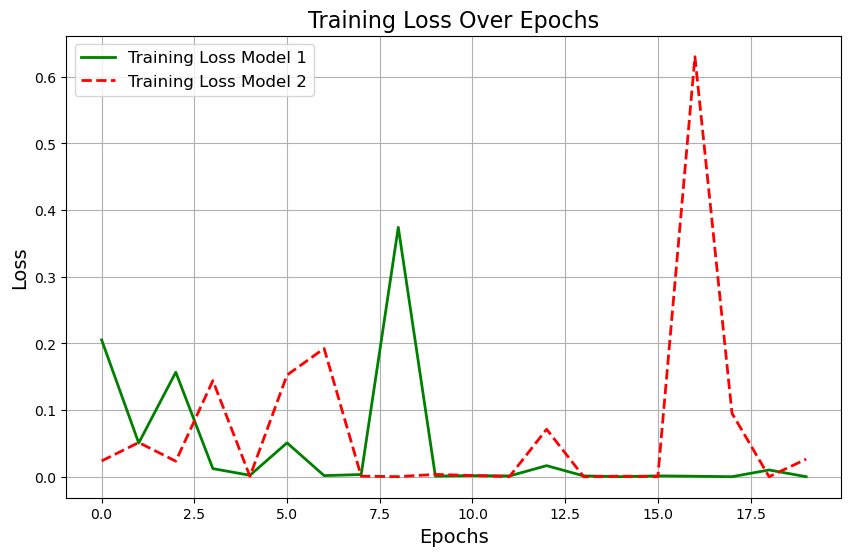

In [43]:
import matplotlib.pyplot as plt

# Convert tensors to NumPy arrays
losses_model1 = train_losses1.detach().numpy()
losses_model2 = train_losses2.detach().numpy()

# Plotting the training losses of both models
plt.figure(figsize=(10, 6))

plt.plot(losses_model1, color='green', linestyle='-', linewidth=2, label='Training Loss Model 1')
plt.plot(losses_model2, color='red', linestyle='--', linewidth=2, label='Training Loss Model 2')

plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


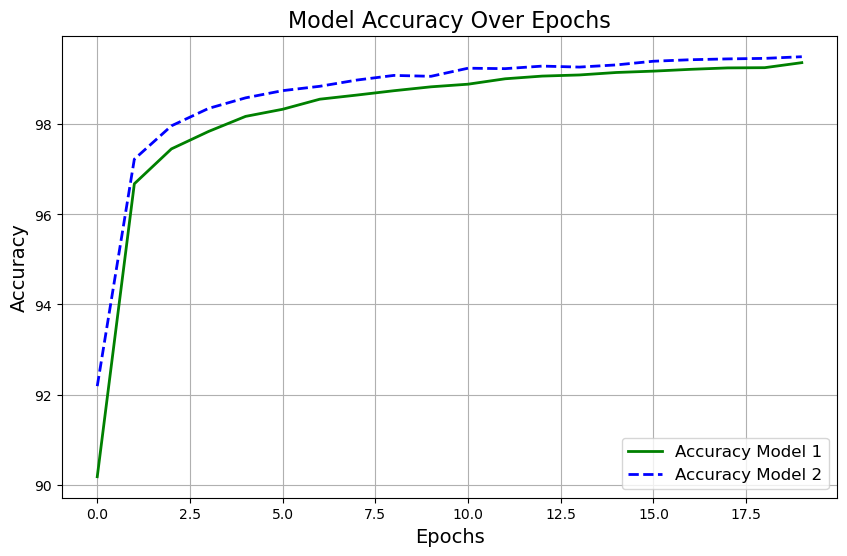

In [44]:
import matplotlib.pyplot as plt

# Assuming train_correct1 and train_correct2 are lists of correct predictions counts
# and that the total number of samples is 600

# Scale the accuracy data for plotting
accuracy_model1 = [t / 600 for t in train_correct1]
accuracy_model2 = [t / 600 for t in train_correct2]

# Plotting accuracy of all models
plt.figure(figsize=(10, 6))

plt.plot(accuracy_model1, color='green', linestyle='-', linewidth=2, label='Accuracy Model 1')
plt.plot(accuracy_model2, color='blue', linestyle='--', linewidth=2, label='Accuracy Model 2')

plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()
